In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt                                           # used for plotting
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split                        # used for splitting the data
from sklearn import tree 
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression                             # used for linear regression
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelEncoder                            # used for converting column into indicator
from sklearn.preprocessing import StandardScaler, MinMaxScaler            # used for scaling Standardization and Normalization
from sklearn.model_selection import cross_val_score                       # used for cross validation
from sklearn.metrics import mean_squared_error                            # used to find actual and predicted values

import warnings
warnings.filterwarnings("ignore") 

In [20]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [22]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [23]:
df1 = df.copy()

In [24]:
# TASK 1
df=df.drop(['id','date','lat','long','sqft_living15','sqft_lot15','yr_renovated'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074


In [25]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,1:14]
Y = df.iloc[:,0:1]

X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size=0.2, random_state=13)

In [26]:
# TASK 2
from sklearn.linear_model import LinearRegression
Model = LinearRegression()
Model.fit(X_train, Y_train)

LinearRegression()

In [27]:
Model.score(X_test,Y_test)

0.6693053925455075

In [28]:
# TASK 3
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)
y_pred

array([360222.5, 294875. , 258540. , ..., 507372.8, 495222.5, 357025. ])

In [29]:
results = list()

In [30]:
model=RandomForestRegressor(max_depth=2)
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=20)
n_scores=cross_val_score(model, X, Y, cv=cv, n_jobs=-1, error_score='raise')

results.append(n_scores)

print('F1-Score: %.3f (%.3f)' % (n_scores.mean(), n_scores.std()))

F1-Score: 0.518 (0.026)


In [31]:
print('RMSE : ',np.sqrt(mean_squared_error(Y_test,y_pred)))

RMSE :  154409.1997748722


In [32]:
# TASK 4
df1=df1.drop(['date'],axis=1)

In [34]:
data_train, data_test = train_test_split(df1,test_size=0.3,random_state=1)
x_train=data_train.drop(columns='price',axis=1)
y_train=data_train['price']
x_test=data_test.drop(columns='price',axis=1)
y_test=data_test['price']

In [35]:
reg = RandomForestRegressor()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
y_pred

array([ 445143.5       ,  409935.47333333,  635169.02      , ...,
        355147.06      , 2210137.        ,  598300.        ])

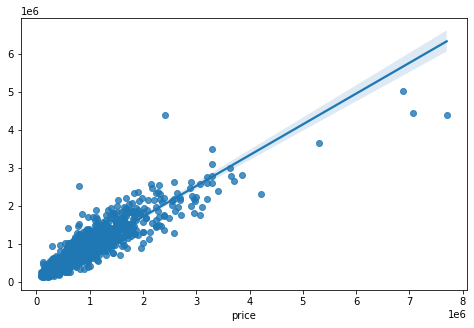

In [36]:
fig, ax= plt.subplots(figsize=(8,5))
sns.regplot(y_test,y_pred)
plt.show()